## Machine Learning Model Building Pipeline: Feature Engineering

In this section, we will cover Feature Engieering aspects of Machine Learning Model Building pipeline. For ease of understanding, we will create a separate notebook for each of the following parts of the Machine Learning pipeline. 
1. Data preparation and Exploratory Data Analysis (EDA)
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for Feature Engieneering**

We will use the house price dataset available on [Kaggle.com]
<br/>(https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). 
<br/>See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning regression model to predict the price of home based on different attributes of the house. Obviously, being able to predict the price of the house is of great importance to both the buyer and seller of the house in addition to investors (to figure out whether the proposed price is either over estimated or under estimated)

### Goal of the modeling problem

The goal of the project is to predict the price of the house as close as possible to the actual sale price historically.

### Data for the problem

The data can be downloaded from the following website
<br/>https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
<br/>Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'Housing_Data.csv' and save it in a directory named "DataSets".

====================================================================================================

## House Prices dataset: Feature Engineering

In the following cells, we will engineer / pre-process the variables of the House Price Dataset from Kaggle. We will engineer the variables so that we tackle:

1. Missing values
2. Temporal variables
3. Non-Gaussian distributed variables
4. Categorical variables: remove rare labels
5. Categorical variables: convert strings to numbers
5. Standarise the values of the variables to the same range

### Setting the seed

It is important to note that we are engineering variables and pre-processing data with the idea of deploying the model if we find business value in it. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

In [1]:
# To handle datasets. These are standard imports
import pandas as pd
import numpy as np
import os

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
# to display data with high width
pd.set_option('display.width', 1000)

In [2]:
# Make the output of notebook stable across runs by setting randon seed
np.random.seed(42)

# To make the pictures pretty
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Set up directories to work with datasets and images
PROJECT_ROOT_DIR = os.getcwd()
DATASET_FOLDER = "DataSets"    # Data goes into the DataSets folder
IMAGES_FOLDER = "IMAGES"       # Images go into IMAGES folder

DATASET_PATH = os.path.join(PROJECT_ROOT_DIR, DATASET_FOLDER)
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, IMAGES_FOLDER)

def load_data(filename, dataset_path=DATASET_PATH):
    """Helper Function to load data. Inputs are file name and directory where datasets are stored"""
    file_with_path = os.path.join(dataset_path, filename)
    return pd.read_csv(file_with_path)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Helper Function to save data. Inputs are file name and directory where datasets are stored"""
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
data = load_data(filename="Housing_Data.csv")

# visualise the dataset by printing the first three rows
print("\nThe first 3 rows of data frame:")
data.head(3)


The first 3 rows of data frame:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### Separate dataset into train and test

Before beginning to engineer our features, it is important to separate our data into training and testing set and make decisions on feature engineering only based on the training set data, even though the transformations will be applied to both training and testing data. This is to avoid over-fitting and create realistic conditions where we will only have the training set available during deployment. This step involves randomness, therefore, we need to set the seed.

In [4]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice,
                                                    test_size=0.1,   # 90% data for training, 10% for testing
                                                    random_state=0) # we are setting the seed here
X_train.shape, X_test.shape

((1314, 81), (146, 81))

### Missing values

For categorical variables, we will fill missing information by adding an additional category called "blank"

In [5]:
# make a list of the categorical variables that contain missing values
vars_with_na = [var for var in data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes=='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 2),  ' % missing values')

Alley 0.94  % missing values
MasVnrType 0.0  % missing values
BsmtQual 0.02  % missing values
BsmtCond 0.02  % missing values
BsmtExposure 0.03  % missing values
BsmtFinType1 0.02  % missing values
BsmtFinType2 0.03  % missing values
FireplaceQu 0.47  % missing values
GarageType 0.06  % missing values
GarageFinish 0.06  % missing values
GarageQual 0.06  % missing values
GarageCond 0.06  % missing values
PoolQC 1.0  % missing values
Fence 0.81  % missing values
MiscFeature 0.96  % missing values


In [6]:
# function to replace NA in categorical variables
def fill_categorical_na(df, var_list, missing_str='Blank'):
    """Helper function to replace missing values in a variable with given string or value"""
    X = df.copy()
    X[var_list] = df[var_list].fillna(missing_str)
    return X

In [7]:
# replace missing values with new label: "Blank"
X_train = fill_categorical_na(X_train, vars_with_na, 'Blank')
X_test = fill_categorical_na(X_test, vars_with_na, 'Blank')

# check that we have no missing information in the engineered variables
X_train[vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

For numerical variables, we are going to add an additional variable capturing the missing information, and then replace the missing information in the original variable by the mode(most frequent value) or mean or some other suitable value:

In [8]:
# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in data.columns if X_train[var].isnull().sum()>1 and X_train[var].dtypes!='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(X_train[var].isnull().mean(), 3),  ' % missing values')

LotFrontage 0.177  % missing values
MasVnrArea 0.005  % missing values
GarageYrBlt 0.056  % missing values


In [9]:
# replace the missing values

def fill_vars_na(vars_with_na, repl_type="mode"):
    for var in vars_with_na:

        if repl_type=="mode":
            repl_val = X_train[var].mode()[0]
        elif repl_type=="mean":
            repl_val = X_train[var].mean()
        else:
            raise exception("The input argument Repl_type not correctly set")

        # train
        X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
        X_train[var].fillna(repl_val, inplace=True)

        # test
        X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)
        X_test[var].fillna(repl_val, inplace=True)

fill_vars_na(vars_with_na, repl_type="mode")  # Fill the missing values with the mode of the column

# check that we have no more missing values in the engineered variables
X_train[vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [10]:
# check that we have the added binary variables that capture missing information
X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,0,0,0
656,0,0,0
45,0,0,0
1348,1,0,0
55,0,0,0


### Temporal variables

We remember from the previous section, that there are 4 variables that refer to the years in which something was built or something has happened to the property in consideration. Time is an example of a variable where differences are more sensible to get useful information than the raw dates itself. 

In [11]:
# let's explore the relationship between the year variables and the house price

def elapsed_years(df, timevar, basevar):
    # capture difference from base variable and replace older values
    df[timevar] = df[basevar] - df[timevar]
    return df

In [12]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    basevar = 'YrSold'   # "YrSold" is the base variable to measure time from
    X_train = elapsed_years(X_train, var, basevar)
    X_test = elapsed_years(X_test, var, basevar)

In [13]:
# check that test set does not contain null values in the engineered variables
[vr for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'] if X_test[var].isnull().sum()>0]

[]

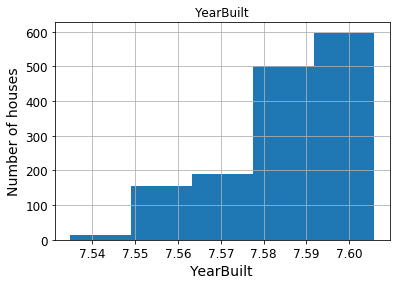

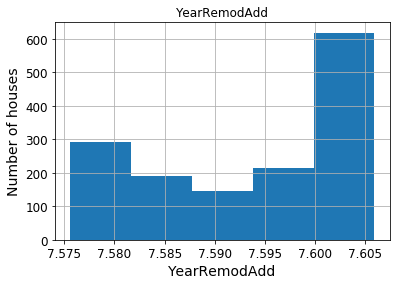

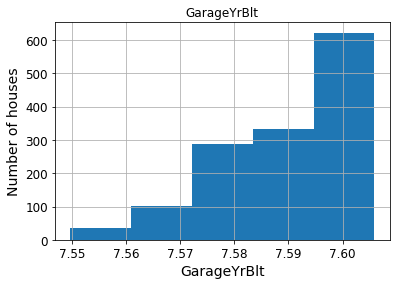

In [14]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var, bins=20):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=bins)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    analyse_transformed_continous(data, var, bins=5)

### Numerical variables

We will log transform the numerical variables that do not contain zeros in order to get a more Gaussian-like distribution. This tends to help Linear machine learning models. 

In [15]:
def transform_cols(varlist):
    for var in varlist:
        X_train[var] = np.log(X_train[var])
        X_test[var]= np.log(X_test[var])
           
transform_cols(['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'])

In [16]:
# check that test set does not contain null values in the engineered variables
[var for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] if X_test[var].isnull().sum()>0]

[]

In [17]:
# same for train set
[var for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] if X_train[var].isnull().sum()>0]

[]

### Categorical variables

First, we will remove those categories within variables that are present in less than 1% of the observations (Rare categories). This will ensure we do not overfit the data.

In [18]:
# let's capture the categorical variables first
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']
print(cat_vars)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [19]:
def find_rare_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of rows in the dataset
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp<rare_perc].index

for var in cat_vars:
    rare_ls = find_rare_labels(X_train, var, 0.01)
    X_train[var] = np.where(X_train[var].isin(rare_ls), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(rare_ls), X_test[var], 'Rare')

Next, we need to transform the strings of these variables into numbers. We will do it so that we capture the monotonic relationship between the label and the target. This is called Ordinal Encoding where the value of variables includes meaningful information for the machine learning algorithms to capture.

In [20]:
# Ordinal Encoding of the variables
def ordinal_encoding(train, test, var, target):
    ordered_labels = train.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [21]:
for var in cat_vars:
    ordinal_encoding(X_train, X_test, var, 'SalePrice')

In [22]:
# check absence of na in train data set
print([var for var in X_train.columns if X_train[var].isnull().sum()>0])

# check absence of na in test data set
print([var for var in X_test.columns if X_test[var].isnull().sum()>0])

[]
[]


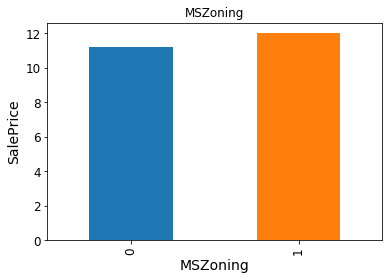

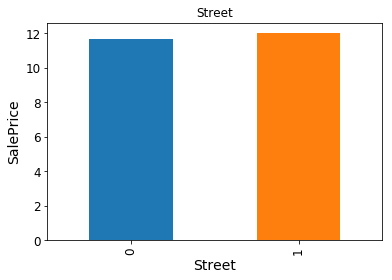

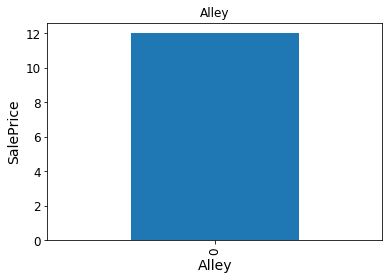

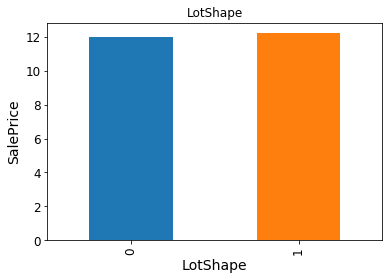

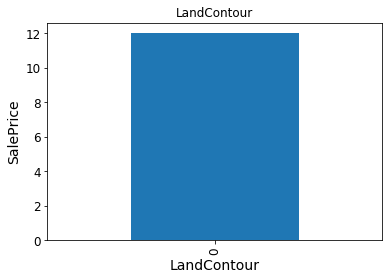

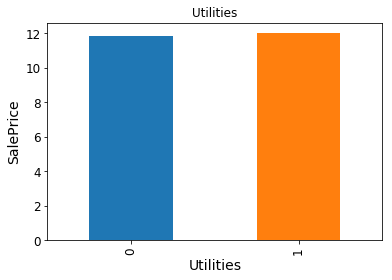

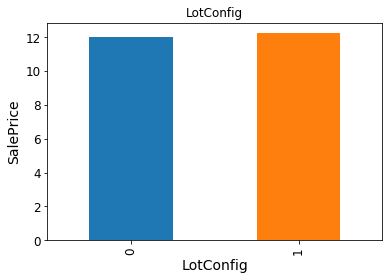

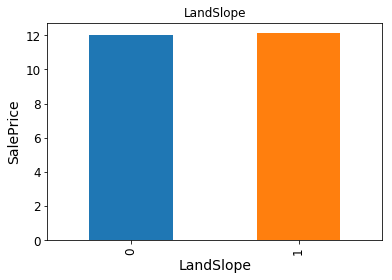

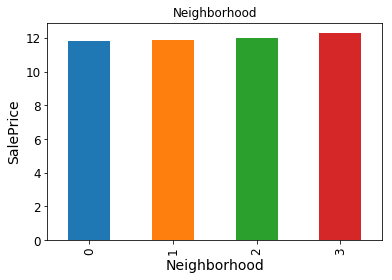

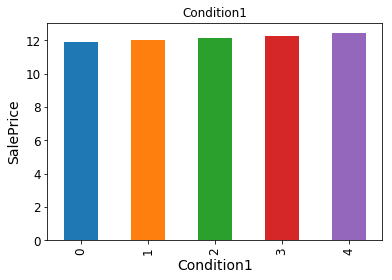

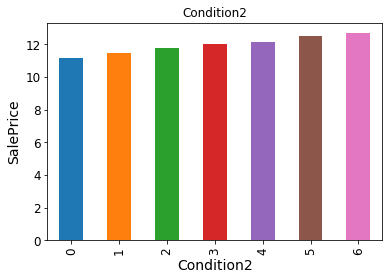

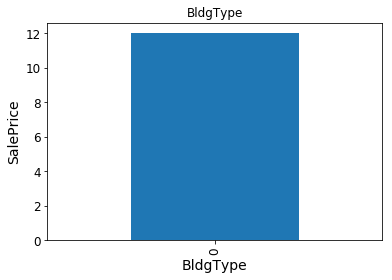

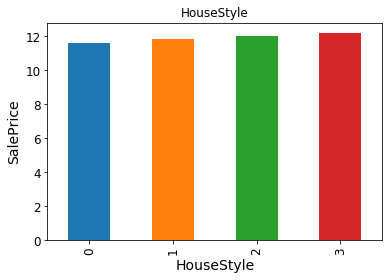

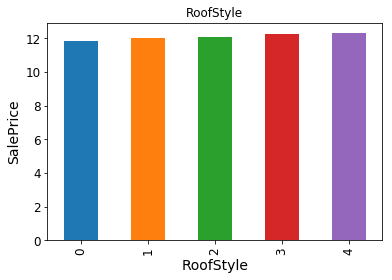

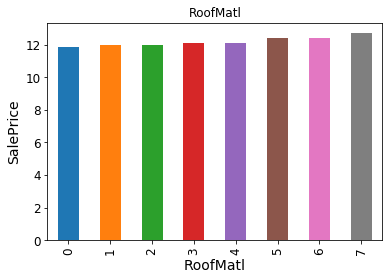

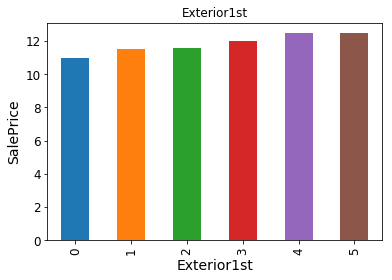

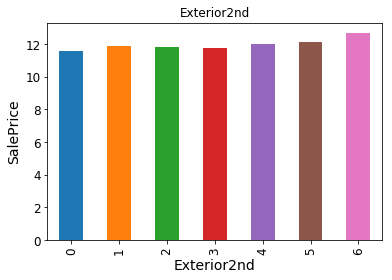

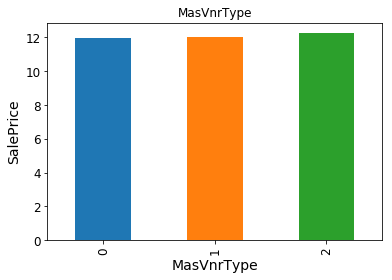

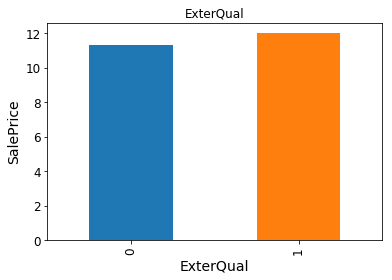

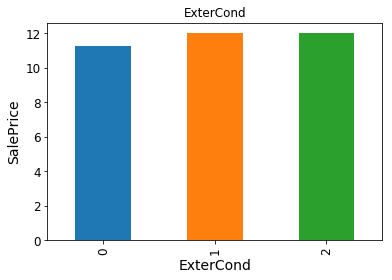

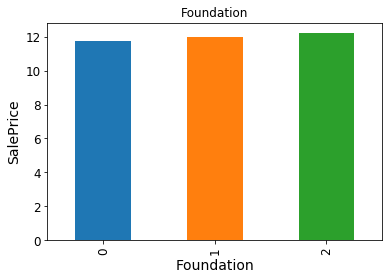

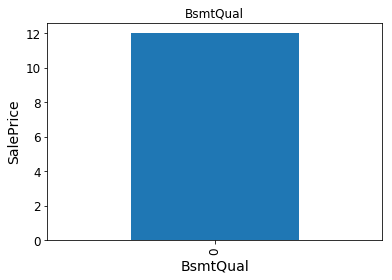

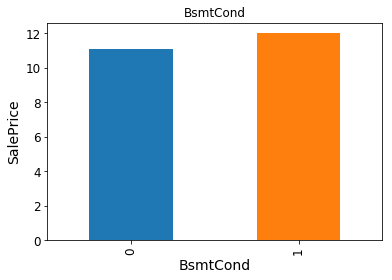

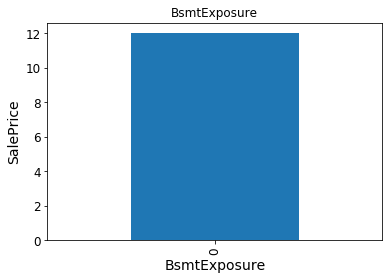

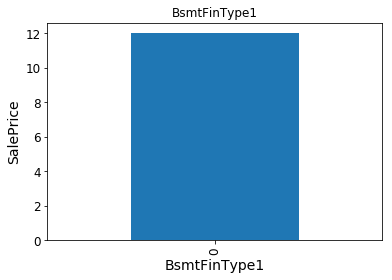

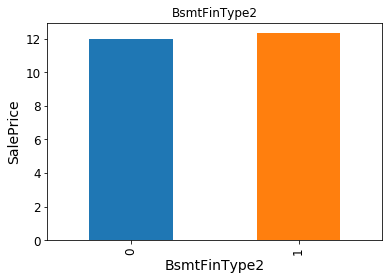

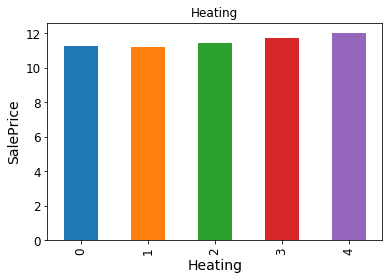

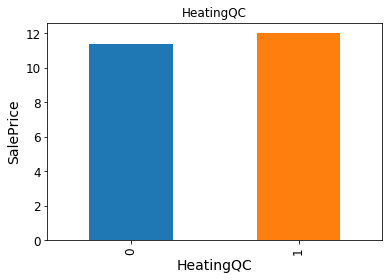

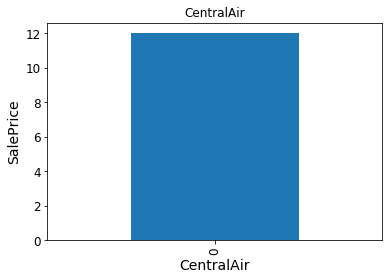

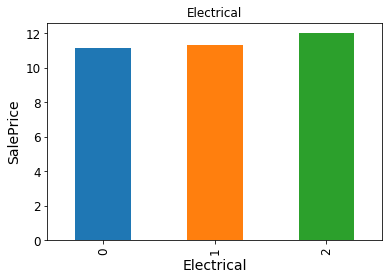

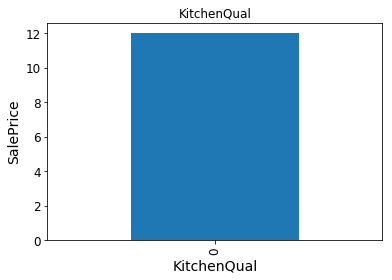

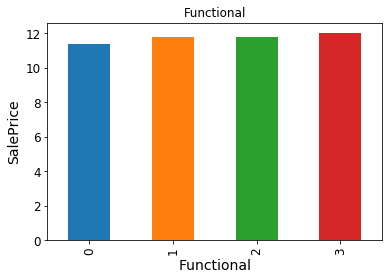

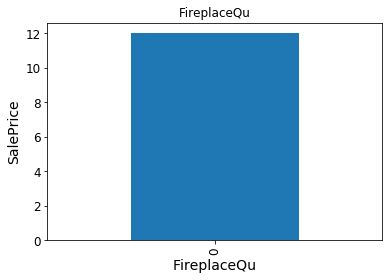

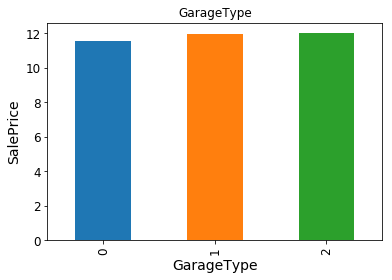

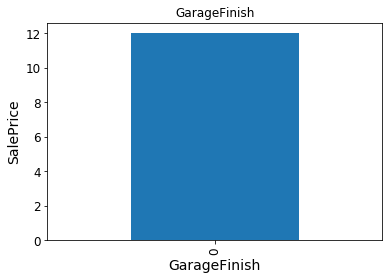

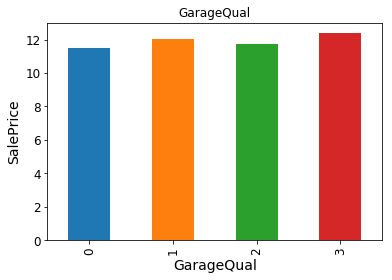

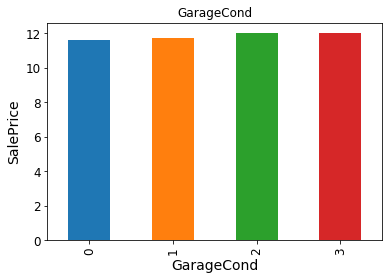

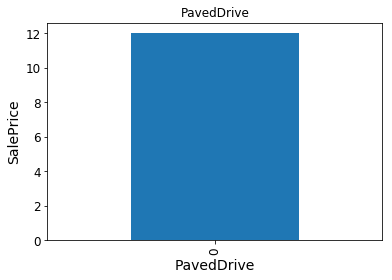

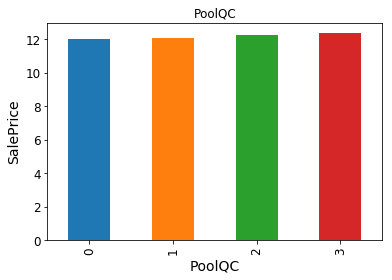

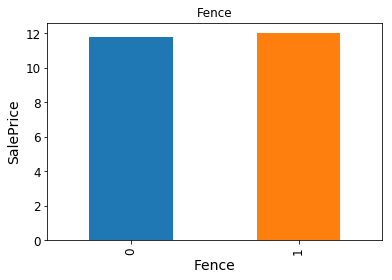

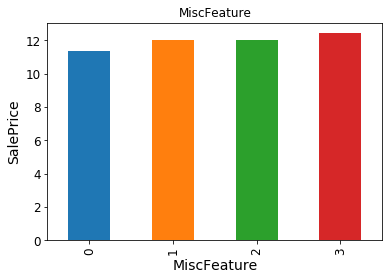

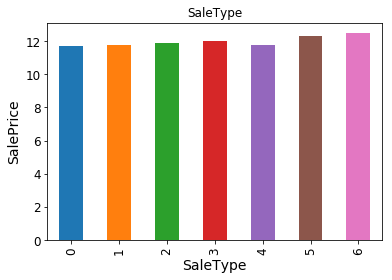

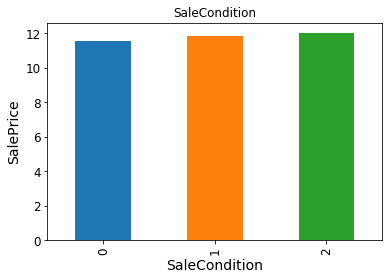

In [23]:
# The following function plots the caterogies in a monotonous fashion
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

We can now see monotonic relationships between the labels of our variables and the target (remember that the target is log-transformed, which makes the differences look small).

In [24]:
train_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]
print(f"Number of variables in training set: {len(train_vars)}")
X_train[['Id', 'SalePrice']].reset_index(drop=True)

Number of variables in training set: 82


,Id,SalePrice
0,931,12.211060
1,657,11.887931
2,46,12.675764
3,1349,12.278393
4,56,12.103486
5,1229,12.813918
6,964,12.384219
7,922,11.890677
8,459,11.989160
9,1387,12.429216


In [25]:
# fit Min max scaler (which maps variables btween 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[train_vars]) #  fit  the scaler to the train set for later use

# The following 3 lines of code will create a standard scaler function, which we are not using in our analysis
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() # create an instance
# scaler.fit(X_train[train_vars]) #  fit  the standard scaler to the train set for later use

# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.concat([X_train[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)],
                    axis=1)

X_test = pd.concat([X_test[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)],
                    axis=1)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [26]:
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,1.0,0.461171,0.377048,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.777778,0.50,0.014706,0.049180,0.25,0.285714,0.6,0.666667,0.5,0.00000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.0,0.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.0,0.416667,1.0,0.000000,0.0,1.0,0.018692,0.0,0.75,0.430183,0.333333,0.666667,0.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.545455,0.75,0.5,1.0,0.0,0.0,0.0
1,657,11.887931,0.000000,1.0,0.456066,0.399443,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.444444,0.75,0.360294,0.049180,0.25,0.285714,0.6,0.666667,0.5,0.03375,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.0,0.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.0,0.250000,1.0,0.000000,0.0,1.0,0.457944,0.0,0.25,0.220028,0.333333,0.666667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.636364,0.50,0.5,1.0,0.0,0.0,0.0
2,46,12.675764,0.588235,1.0,0.394699,0.347082,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.888889,0.50,0.036765,0.098361,0.25,0.285714,0.6,0.666667,0.5,0.25750,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.0,0.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,0.0,0.333333,1.0,0.333333,0.0,1.0,0.046729,0.0,0.50,0.406206,0.333333,0.666667,0.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.090909,1.00,0.5,1.0,0.0,0.0,0.0
3,1349,12.278393,0.000000,1.0,0.388581,0.493677,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.666667,0.50,0.066176,0.163934,0.25,0.285714,0.6,0.666667,0.5,0.00000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.0,0.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.0,0.250000,1.0,0.333333,0.0,1.0,0.084112,0.0,0.50,0.362482,0.333333,0.666667,0.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.636364,0.25,0.5,1.0,1.0,0.0,0.0
4,56,12.103486,0.000000,1.0,0.577658,0.402702,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.555556,0.50,0.323529,0.737705,0.25,0.285714,0.6,0.666667,0.5,0.17000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.086818,0.0,0.0,0.434278,0.233224,1.0,1.0,0.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.0,0.416667,1.0,0.333333,0.0,1.0,0.411215,0.0,0.50,0.406206,0.333333,0.666667,0.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,1.0,0.333333,0.0,0.545455,0.50,0.5,1.0,0.0,0.0,0.0


In [27]:
# check if there are any missing values
X_train.isnull().sum()

Id                0
SalePrice         0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
                 ..
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0


### Feature Creation

We can combine variables to create new ratio features which may add more value

In [28]:
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,1.0,0.461171,0.377048,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.777778,0.50,0.014706,0.049180,0.25,0.285714,0.6,0.666667,0.5,0.00000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.0,0.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.0,0.416667,1.0,0.000000,0.0,1.0,0.018692,0.0,0.75,0.430183,0.333333,0.666667,0.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.545455,0.75,0.5,1.0,0.0,0.0,0.0
1,657,11.887931,0.000000,1.0,0.456066,0.399443,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.444444,0.75,0.360294,0.049180,0.25,0.285714,0.6,0.666667,0.5,0.03375,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.0,0.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.0,0.250000,1.0,0.000000,0.0,1.0,0.457944,0.0,0.25,0.220028,0.333333,0.666667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.636364,0.50,0.5,1.0,0.0,0.0,0.0
2,46,12.675764,0.588235,1.0,0.394699,0.347082,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.888889,0.50,0.036765,0.098361,0.25,0.285714,0.6,0.666667,0.5,0.25750,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.0,0.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,0.0,0.333333,1.0,0.333333,0.0,1.0,0.046729,0.0,0.50,0.406206,0.333333,0.666667,0.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.090909,1.00,0.5,1.0,0.0,0.0,0.0
3,1349,12.278393,0.000000,1.0,0.388581,0.493677,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.666667,0.50,0.066176,0.163934,0.25,0.285714,0.6,0.666667,0.5,0.00000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.0,0.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.0,0.250000,1.0,0.333333,0.0,1.0,0.084112,0.0,0.50,0.362482,0.333333,0.666667,0.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.636364,0.25,0.5,1.0,1.0,0.0,0.0
4,56,12.103486,0.000000,1.0,0.577658,0.402702,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.25,0.5,0.0,0.666667,0.555556,0.50,0.323529,0.737705,0.25,0.285714,0.6,0.666667,0.5,0.17000,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.086818,0.0,0.0,0.434278,0.233224,1.0,1.0,0.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.0,0.416667,1.0,0.333333,0.0,1.0,0.411215,0.0,0.50,0.406206,0.333333,0.666667,0.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,1.0,0.333333,0.0,0.545455,0.50,0.5,1.0,0.0,0.0,0.0


In [29]:
def analyze_ratiovars(df, continuous_vars, ratio_vars):
    data = df.copy()
    continuous_vars = continuous_vars
    ratio_vars = ratio_vars
    # Correlation of continuous variables with SalePrice
    for var in continuous_vars:
        print(f"Correlation of {var} with SalePrice is {data[var].corr(data['SalePrice'])}")

    newvars = []
    for item in ratio_vars:
        data[item[1]].replace(0,data[item[1]].mean())  # Replace null values in denominator with mean value
        data[item[0]+"/"+item[1]] = data[item[0]]/data[item[1]]
        newvars.append(item[0]+"/"+item[1])

    # Correlation of ratio variables with SalePrice
    print(f"\nTrying to find if any ratio variables provide better correlation:\n")
    for var in newvars:
        print(f"Correlation of {var} with SalePrice is {data[var].corr(data['SalePrice'])}")

continuous_vars = ['FullBath','LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea']
ratio_vars = zip(['FullBath', 'TotalBsmtSF', 'PoolArea', 'GarageArea'],['LotArea', 'LotArea', 'LotArea', 'OpenPorchSF'])

analyze_ratiovars(X_train, continuous_vars, ratio_vars)

Correlation of FullBath with SalePrice is 0.5850480862600298
Correlation of LotArea with SalePrice is 0.40249440016635857
Correlation of MasVnrArea with SalePrice is 0.42329634973088476
Correlation of BsmtUnfSF with SalePrice is 0.20978532282018547
Correlation of TotalBsmtSF with SalePrice is 0.6100142572214868
Correlation of GrLivArea with SalePrice is 0.7260521555279639
Correlation of GarageArea with SalePrice is 0.6559006104904076
Correlation of OpenPorchSF with SalePrice is 0.31143553406382934
Correlation of EnclosedPorch with SalePrice is -0.15443161383833487
Correlation of PoolArea with SalePrice is 0.03847116575343426

Trying to find if any ratio variables provide better correlation:

Correlation of FullBath/LotArea with SalePrice is nan
Correlation of TotalBsmtSF/LotArea with SalePrice is nan
Correlation of PoolArea/LotArea with SalePrice is 0.035944697605516204
Correlation of GarageArea/OpenPorchSF with SalePrice is nan


In [30]:
# let's save the train and test sets for the next stage which is Feature Selection

X_train.to_csv(os.path.join(DATASET_PATH,r'xtrain.csv'),index=False)
X_test.to_csv(os.path.join(DATASET_PATH,r'xtest.csv'),index=False)